In [2]:
! pip install tensorflow==2.0.0-alpha0

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
!pip install pyhamcrest

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#Necesitamos que la derivada sea 1 (como con relu) para que el número de capas de la NN no afecte al resultado
#Para hacer una NN lo primero es que compile, luego que haga el backpropagation, luego que haga overfit (si no lo hace en un subdataset no es capaz de aprender nada)
#El Dropout es una técnica para reducir el overfit
#Softmax : más cercano a 1 significa que la NN está muy segura de esa predicción (o poco si tira a 0)
#Adam se usa mucho y uno de los motivos es que el learning rate no afectará tanto a la NN

In [ ]:
#Layer convolucional: tf.keras.layers.Conv2D y elegir número de kernels (en primer lugar arriba)
#Un filtro de convolución es una matriz nxn (e.g. 3x3) y va pasando por toda la matriz de datos multiplicándolas
#Esto lo puede hacer x veces = número de kernels
#Los filtros de convolución se hacen para reducir la dimensionalidad de la imagen 
#Por ejemplo, la técnica de pooling coge los elementos del vector que superan un threshold y crea una nueva imagen, quedándose así con una nueva imagen más reducida pero con elementos importantes
#Cada pixel es una neurona, así que tenemos que hacer la NN convolucional hasta que tengamos un número adecuado de neuronas (unas 1000) y luego entrenamos una NN normal
#El filtro de convolución es importante cuando queremos que la distancia de la x y la y se tenga en cuenta (representar las propiedades espaciales)


In [ ]:
#Recurrent NN se usan cuando importa el orden de los datos (e.g. para predecir en el tiempo)

In [4]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

#Epochs : cuantas veces el modelo ve todo el dataset

Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2972 - accuracy: 0.9122
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1395 - accuracy: 0.9583
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1049 - accuracy: 0.9685
Epoch 4/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0866 - accuracy: 0.9731
Epoch 5/5
10000/10000 [==============================] - 0s 27us/sample - loss: 0.0742 - accuracy: 0.9774


[0.07422570660612546, 0.9774]

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
import PIL

True 7 
Predicted 7



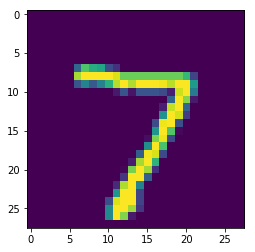

True 2 
Predicted 2



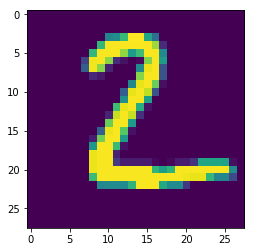

True 1 
Predicted 1



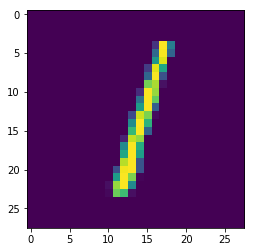

True 0 
Predicted 0



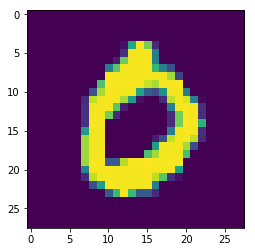

True 4 
Predicted 4



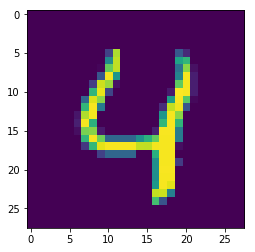

In [56]:
N = 5

for i in range(N):
    data_orig = (x_test[i]*255).astype(np.uint8)
    im = PIL.Image.fromarray(data_orig)
    print(f"True {y_test[i]} \nPredicted {np.argmax(model.predict(np.expand_dims(x_test[i],axis=0)))}\n")
    imshow(im)
    plt.show()
    

#Puede ser que todas las predicciones que hace la NN no sean muy seguras, entonces podemos poner un threshold en el softmax de, por ejemplo , 0,6, así todas las predicciones que haga serán bastante seguras (aumentaremos la especificidad)

In [57]:
from xgboost import XGBClassifier

In [67]:
model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=4)

In [68]:
model.fit(x_train.reshape(60000,-1), y_train)

#Tenemos que hacer un reshape porque teníamos los datos en matrices (para la NN) y necesitamos tablas para el XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.2,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [69]:
model.score(x_train.reshape(60000,-1),y_train),model.score(x_test.reshape(10000,-1),y_test)

(0.9689, 0.9544)